In [54]:
import  pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

df=pd.read_csv('C:/Users/KIIT/Downloads/tesla_dataset.csv')

df.head(n=10)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
1,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
3,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
4,2010-07-07,1.093333,1.108667,0.998667,1.053333,1.053333,103825500
5,2010-07-08,1.076000,1.168000,1.038000,1.164000,1.164000,115671000
6,2010-07-09,1.172000,1.193333,1.103333,1.160000,1.160000,60759000
7,2010-07-12,1.196667,1.204667,1.133333,1.136667,1.136667,33037500
8,2010-07-13,1.159333,1.242667,1.126667,1.209333,1.209333,40201500
9,2010-07-14,1.196000,1.343333,1.184000,1.322667,1.322667,62928000


In [55]:
df.shape




(3077, 7)

# checking for   not availabel  data

In [4]:
df.isna().sum()





Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3077 entries, 0 to 3076
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3077 non-null   object 
 1   Open       3077 non-null   float64
 2   High       3077 non-null   float64
 3   Low        3077 non-null   float64
 4   Close      3077 non-null   float64
 5   Adj Close  3077 non-null   float64
 6   Volume     3077 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 168.4+ KB


#Checking for  correlation of the aboce data 

<AxesSubplot:>

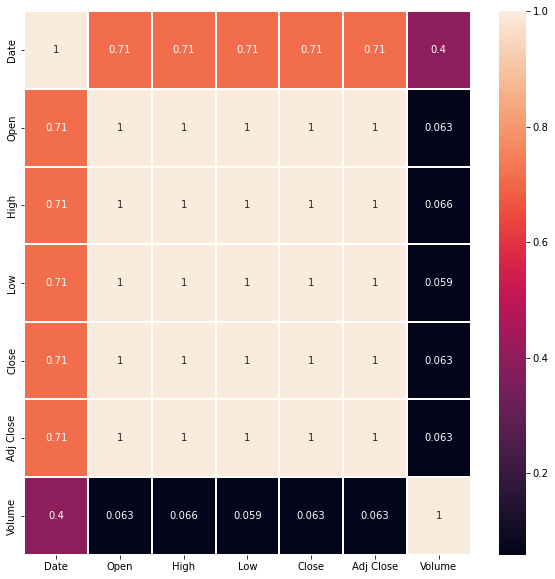

In [75]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(figsize=(10,10))
corr=df.corr()
#corr[(corr < 0.25) & (corr > -0.25)] = 0
sns.heatmap(corr,annot=True,linewidth=2)





(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

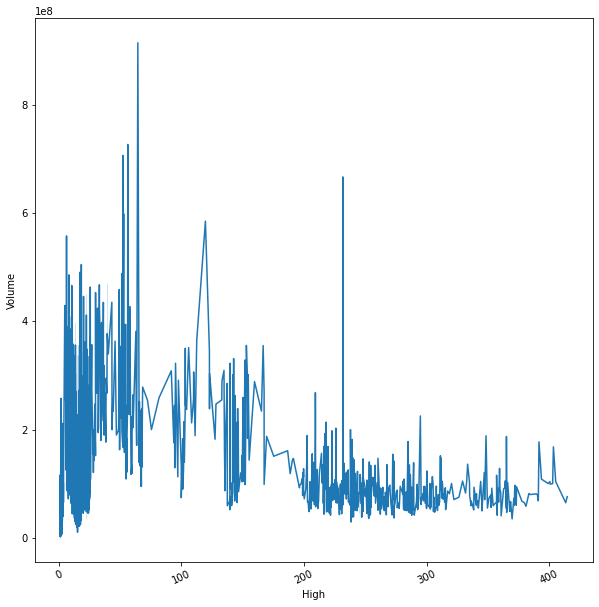

In [7]:
#now showing in bar graph 
plt.figure(figsize=(10,10))
sns.lineplot(data=df, x="High",y="Volume")
plt.xticks(rotation = 25




Text(0.5, 1.0, 'Opening price')

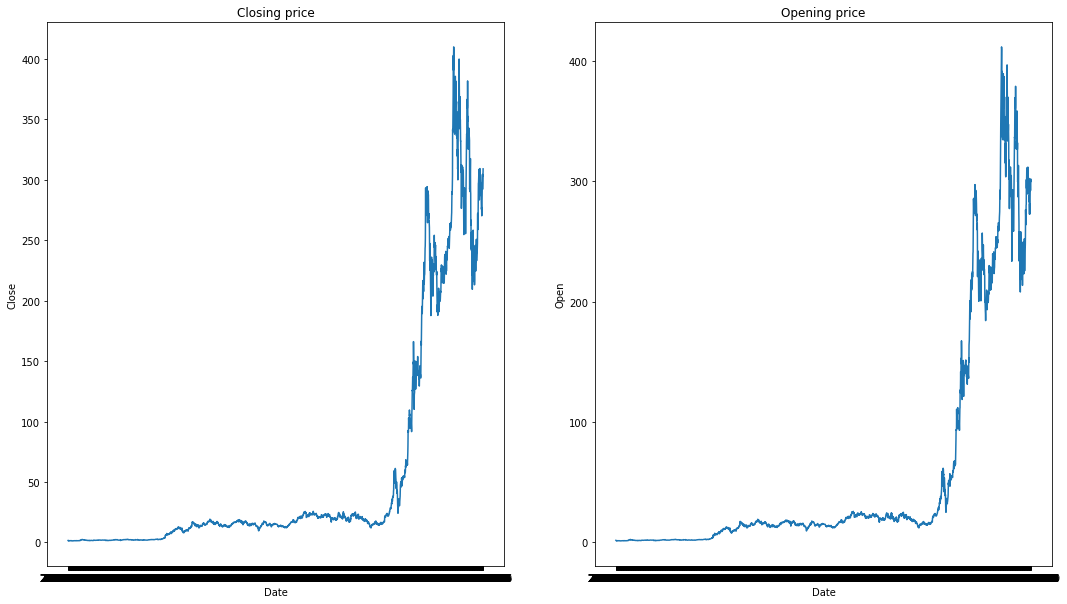

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(18, 10))
sns.lineplot(ax=axes[0],data=df, x="Date",y="Close")
axes[0].set_title('Closing price')

sns.lineplot(ax=axes[1],data=df, x="Date",y="Open")
axes[1].set_title('Opening price')



           

Text(0.5, 1.0, 'Volume vs Closing price')

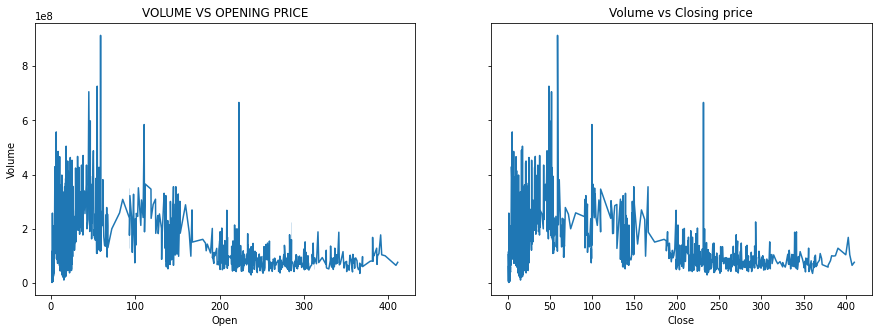

In [15]:
# Open
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
sns.lineplot(ax=axes[0], x='Open', y='Volume',data=df)
axes[0].set_title('VOLUME VS OPENING PRICE')

# Close
sns.lineplot(ax=axes[1], x='Close', y='Volume',data=df)
axes[1].set_title('Volume vs Closing price')



In [56]:
df['Date']=pd.to_datetime(df['Date']).astype('int64')



C:\Users\KIIT\AppData\Local\Temp/ipykernel_6404/846180199.py:1: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  df['Date']=pd.to_datetime(df['Date']).astype('int64')


In [57]:
df['Date']



0       1277856000000000000
1       1277942400000000000
2       1278028800000000000
3       1278374400000000000
4       1278460800000000000
               ...         
3072    1663027200000000000
3073    1663113600000000000
3074    1663200000000000000
3075    1663286400000000000
3076    1663545600000000000
Name: Date, Length: 3077, dtype: int64

In [58]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]



In [25]:
y


0       257806500
1       123282000
2        77097000
3       103003500
4       103825500
          ...    
3072     68229600
3073     72628700
3074     64795500
3075     86949500
3076     60060200
Name: Volume, Length: 3077, dtype: int64

In [68]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape



((2461, 6), (616, 6), (2461,), (616,))

In [27]:
from sklearn.linear_model  import  LinearRegression as lr
regressor=lr()
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)





array([1.32582919e+08, 8.41996222e+07, 8.20621996e+07, 9.05500048e+07,
       1.37067460e+08, 9.75436668e+07, 1.16531685e+08, 1.26951180e+08,
       9.85923208e+07, 5.97442034e+07, 1.09075276e+08, 9.03685343e+07,
       8.39756214e+07, 8.10314026e+07, 4.47931272e+07, 1.33559902e+08,
       8.22265394e+07, 8.50580544e+07, 7.80549593e+07, 1.15107429e+08,
       1.37040943e+08, 8.98415799e+07, 1.18675840e+08, 9.79634695e+07,
       7.01633754e+07, 8.27495662e+07, 6.61362354e+07, 6.26619981e+07,
       8.26281016e+07, 6.63878270e+07, 8.55310934e+07, 9.17404037e+07,
       1.36369472e+08, 6.81673331e+07, 8.31475214e+07, 1.18428692e+08,
       1.23075624e+08, 1.13727431e+08, 1.15165463e+08, 1.12811898e+08,
       6.85705083e+07, 7.40294211e+07, 8.05705518e+07, 9.23575502e+07,
       1.13195373e+08, 7.11086640e+07, 6.84868931e+07, 1.24052966e+08,
       1.20174554e+08, 1.03744997e+08, 6.96413551e+07, 1.25110563e+08,
       1.01269958e+08, 1.35612126e+08, 1.15572245e+08, 9.79550007e+07,
      

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
mae = mean_absolute_error(y_pred, y_test)
mse = mean_squared_error(y_pred, y_test, squared=True)
print(' ',mae,'\n',mse)


  54770298.818429604 
 6492654579184060.0


In [33]:
r2_score(y_test,y_pred)






0.13835829092280483

In [73]:
mse = mean_squared_error(y_pred, y_test, squared=True)
mse


6492654579184060.0

In [40]:
print(regressor.predict([[ 257806500,1.719333,2.028000,1.55333,1.5886,1.588667]]))




                         


[-3.06299123e+08]


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [41]:
df


,Date,Open,High,Low,Close,Adj Close,Volume
0,1277856000000000000,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
1,1277942400000000000,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2,1278028800000000000,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
3,1278374400000000000,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
4,1278460800000000000,1.093333,1.108667,0.998667,1.053333,1.053333,103825500
...,...,...,...,...,...,...,...
3072,1663027200000000000,292.899994,297.399994,290.399994,292.130005,292.130005,68229600
3073,1663113600000000000,292.239990,306.000000,291.640015,302.609985,302.609985,72628700
3074,1663200000000000000,301.829987,309.119995,300.720001,303.750000,303.750000,64795500
3075,1663286400000000000,299.609985,303.709991,295.600006,303.350006,303.350006,86949500


#  now performing scalling  over dataset
 then verify the result

In [65]:
scaler = preprocessing.MinMaxScaler()
names = df.columns
d = scaler.fit_transform(df)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,0.000000,0.001568,0.002224,0.001371,0.001309,0.001309,0.280640
1,0.000224,0.001439,0.001498,0.000871,0.001004,0.001004,0.133184
2,0.000448,0.001114,0.001043,0.000614,0.000554,0.000554,0.082560
3,0.001344,0.000627,0.000543,0.000140,0.000051,0.000051,0.110956
4,0.001568,0.000042,0.000000,0.000000,0.000000,0.000000,0.111857


In [67]:
X=scaled_df.iloc[:,:-1]
y=scaled_df.iloc[:,-1]












0.000000    1
0.625672    1
0.664875    1
0.665099    1
0.665323    1
           ..
0.334229    1
0.334453    1
0.335125    1
0.335349    1
1.000000    1
Name: Date, Length: 3077, dtype: int64

#Outlier treatment 

{'whiskers': [<matplotlib.lines.Line2D at 0x233df31c250>,
 'caps': [<matplotlib.lines.Line2D at 0x233df31c970>,
 'boxes': [<matplotlib.lines.Line2D at 0x233df58de80>],
 'medians': [<matplotlib.lines.Line2D at 0x233df3250d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x233df325460>],
 'means': []}

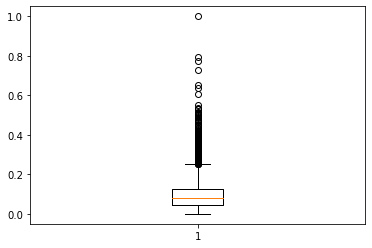

In [76]:
plt.boxplot(scaled_df['Volume'])


In [79]:
x=scaled_df['Date']
upper = x.quantile(.75) + 1.5 * (x.quantile(.75) - x.quantile(.25)) 
lower = x.quantile(.25) - 1.5 * (x.quantile(.75) - x.quantile(.25))




1.4987679211469525

In [ ]:
scaled_df[scaled_df['Date'] >= upper].index

In [80]:
scaled_df = scaled_df.drop(index = scaled_df[scaled_df['Volume'] >= upper].index)


In [81]:
scaled_df.shape


(3077, 7)

In [82]:
X=scaled_df.iloc[:,:-1]
y=scaled_df.iloc[:,-1]



In [83]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape




((2461, 6), (616, 6), (2461,), (616,))

In [84]:
regressor=lr()
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)


#  r2_score is comming better after  scalling  

In [85]:
r2_score(y_test,y_pred)

0.32132875364843827

In [86]:
mse = mean_squared_error(y_pred, y_test, squared=True)
mse



0.006144342272897745

# Then using other model 

In [88]:
from sklearn.tree import DecisionTreeRegressor
treeReg = DecisionTreeRegressor()
treeReg.fit(X_train, y_train)



DecisionTreeRegressor()

In [89]:
r2_score(y_train, treeReg.predict(X_train))


1.0

#  r2_score is better  than linear model 

In [90]:
r2_score(y_test, treeReg.predict(X_test))


0.6597328171436381

In [92]:
from sklearn.model_selection import  GridSearchCV
param_grid = {'max_depth' : range(2, 15)}
tree_clf = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 10, n_jobs = -1, verbose = 1)
tree_clf.fit(X_train, y_train)



Fitting 10 folds for each of 13 candidates, totalling 130 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(2, 15)}, verbose=1)

In [93]:
r2_score(y_train, treeReg.predict(X_train))


1.0

In [94]:
r2_score(y_test, treeReg.predict(X_test))


0.6597328171436381